In [1]:
!pip install librosa pywavelets

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from scipy.io import wavfile
from scipy.signal import resample
import soundfile as sf
import pywt
from google.colab import files

In [3]:
print("⬆️ Upload your WAV file(s)...")
uploaded = files.upload()
filename = next(iter(uploaded))

⬆️ Upload your WAV file(s)...


Saving New_MS_001.wav to New_MS_001.wav



✅ Librosa Loaded: New_MS_001.wav
Sampling Rate: 8000 Hz, Duration: 2.95 sec


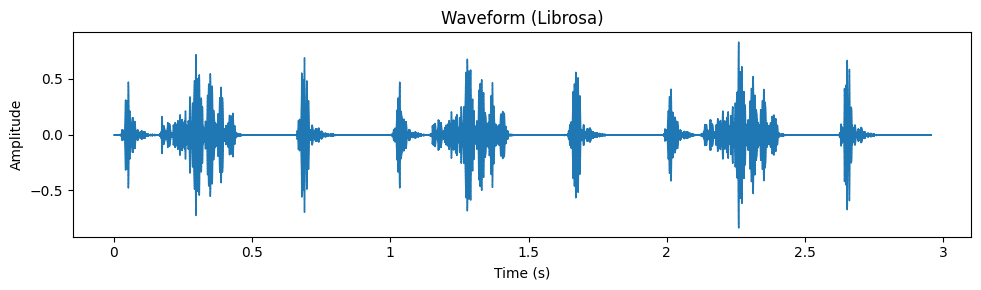

In [4]:
audio_librosa, sr_librosa = librosa.load(filename, sr=None)
duration = len(audio_librosa) / sr_librosa
print(f"\n✅ Librosa Loaded: {filename}")
print(f"Sampling Rate: {sr_librosa} Hz, Duration: {duration:.2f} sec")
ipd.display(ipd.Audio(audio_librosa, rate=sr_librosa))
plt.figure(figsize=(10, 3))
librosa.display.waveshow(audio_librosa, sr=sr_librosa)
plt.title("Waveform (Librosa)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [5]:
sr_scipy, data = wavfile.read(filename)
print(f"\n✅ Scipy Loaded: {filename}")
print(f"Sample Rate: {sr_scipy} Hz, Shape: {data.shape}, Duration: {data.shape[0]/sr_scipy:.2f} sec")


✅ Scipy Loaded: New_MS_001.wav
Sample Rate: 8000 Hz, Shape: (23626,), Duration: 2.95 sec


In [6]:
if data.ndim > 1:
    data = data.mean(axis=1)

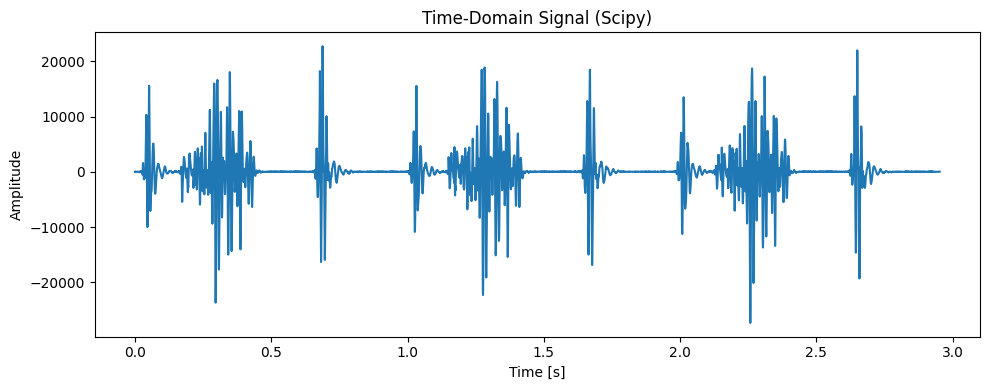

In [7]:
time = np.linspace(0, len(data)/sr_scipy, len(data))
plt.figure(figsize=(10, 4))
plt.plot(time, data)
plt.title("Time-Domain Signal (Scipy)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

🎯 Dominant Frequency: 87.70 Hz


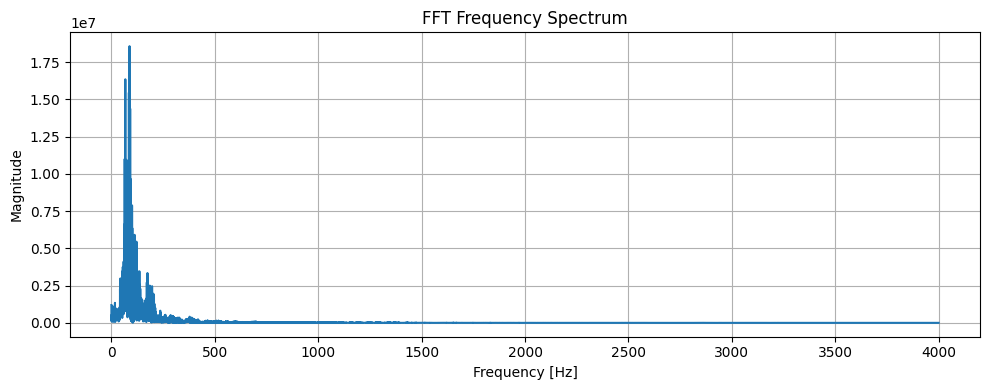

In [8]:
fft_data = np.fft.fft(data)
fft_freq = np.fft.fftfreq(len(data), d=1/sr_scipy)
positive_freqs = fft_freq[:len(fft_freq)//2]
magnitudes = np.abs(fft_data[:len(fft_data)//2])
dominant_freq = positive_freqs[np.argmax(magnitudes)]
print(f"🎯 Dominant Frequency: {dominant_freq:.2f} Hz")

plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitudes)
plt.title("FFT Frequency Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


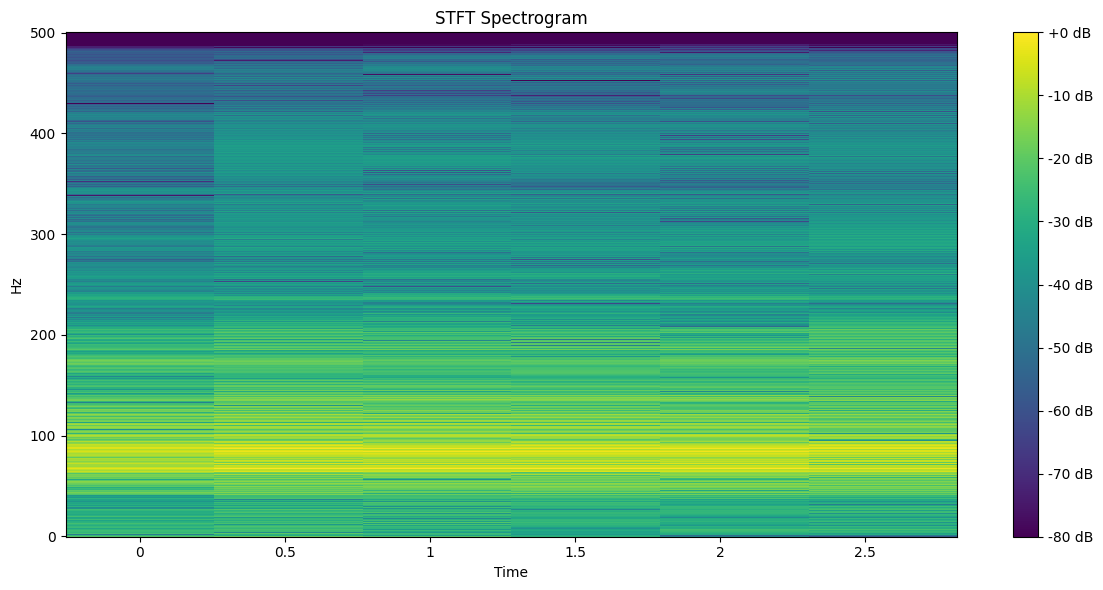

In [9]:
data_float = data.astype(float)
resampled = librosa.resample(data_float, orig_sr=sr_scipy, target_sr=1000)
stft_result = librosa.stft(resampled)
db_spectrogram = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(db_spectrogram, sr=1000, x_axis='time', y_axis='hz', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title("STFT Spectrogram")
plt.tight_layout()
plt.show()


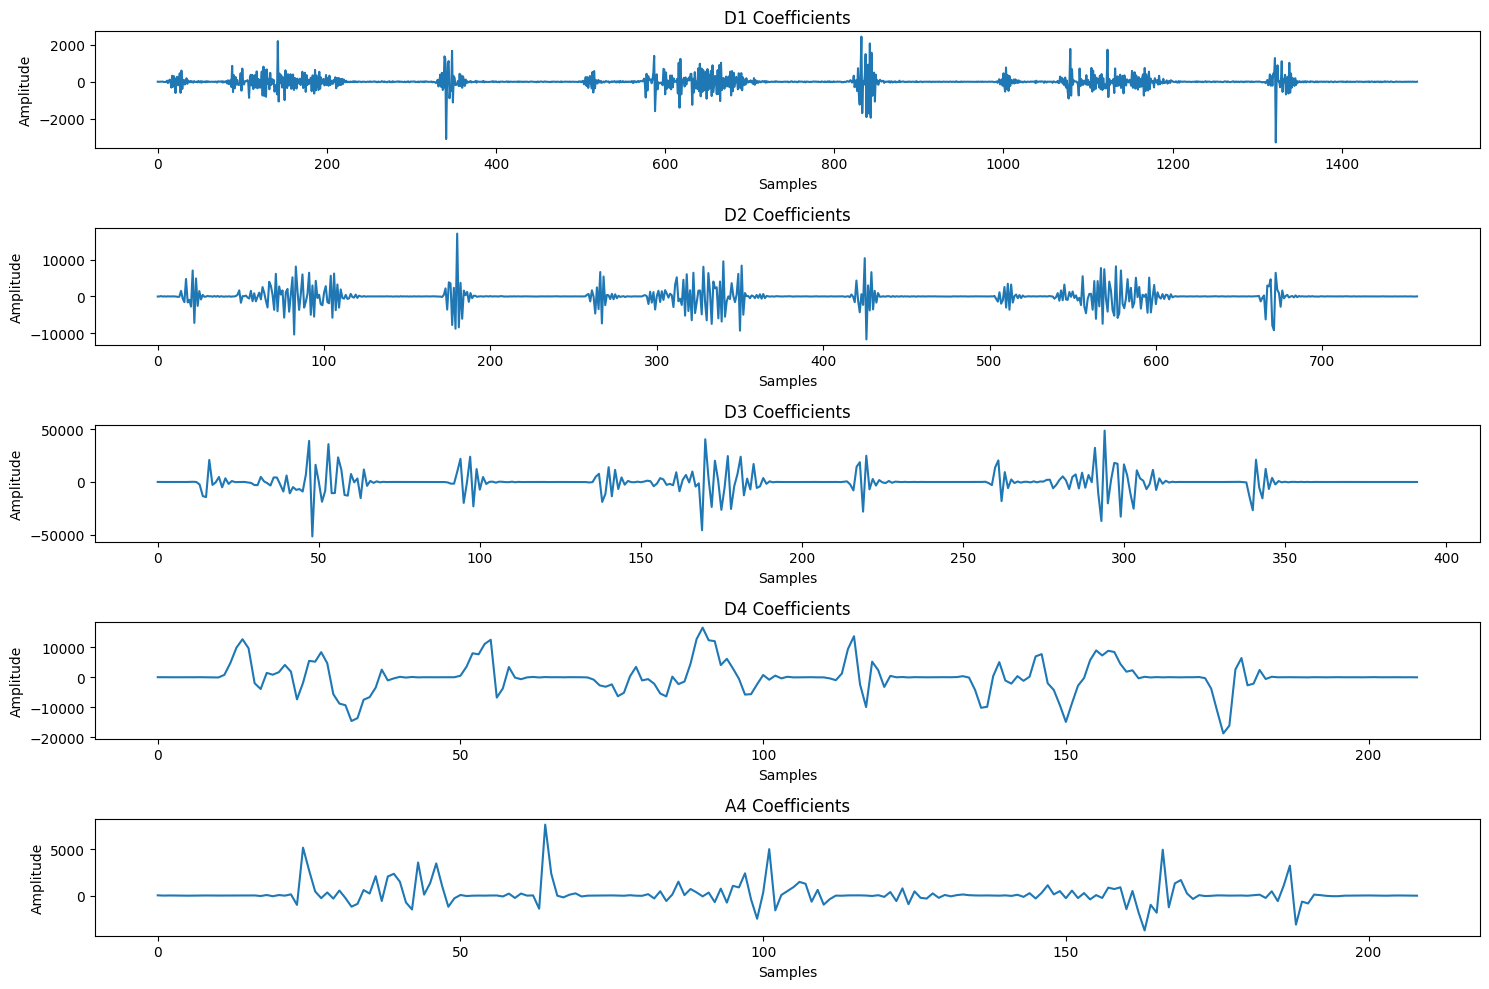

In [10]:
coeffs = pywt.wavedec(resampled, 'db14', level=4)
cA4, cD4, cD3, cD2, cD1 = coeffs

plt.figure(figsize=(15, 10))
for i, coef in enumerate([cD1, cD2, cD3, cD4, cA4], 1):
    plt.subplot(5, 1, i)
    plt.plot(coef)
    label = ['D1', 'D2', 'D3', 'D4', 'A4'][i-1]
    plt.title(f"{label} Coefficients")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

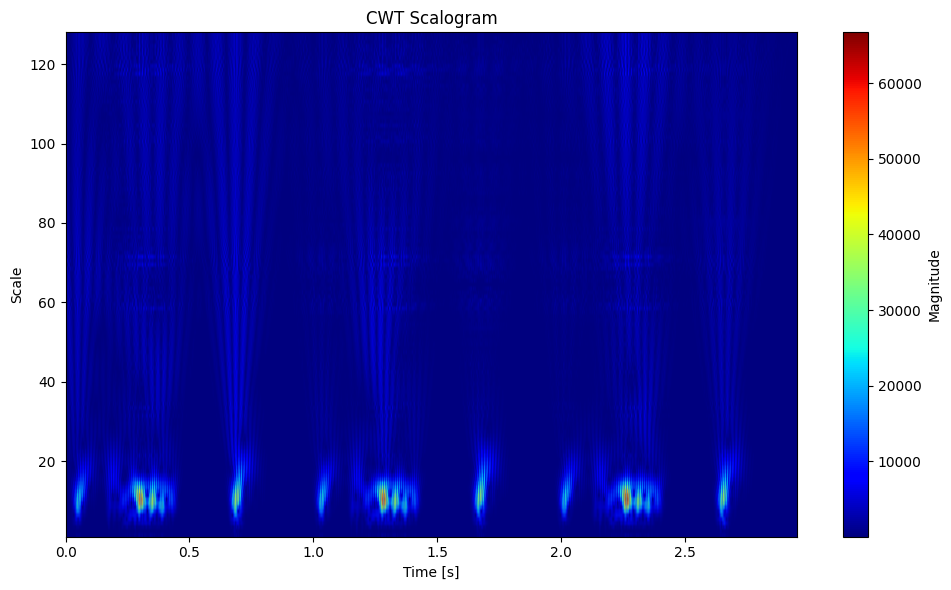

In [11]:
widths = np.arange(1, 128)
cwt_coeffs, freqs = pywt.cwt(resampled, widths, 'morl', sampling_period=1/1000)

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(cwt_coeffs), extent=[0, len(resampled)/1000, 1, 128],
           cmap='jet', aspect='auto', origin='lower')
plt.title("CWT Scalogram")
plt.xlabel("Time [s]")
plt.ylabel("Scale")
plt.colorbar(label="Magnitude")
plt.tight_layout()
plt.show()


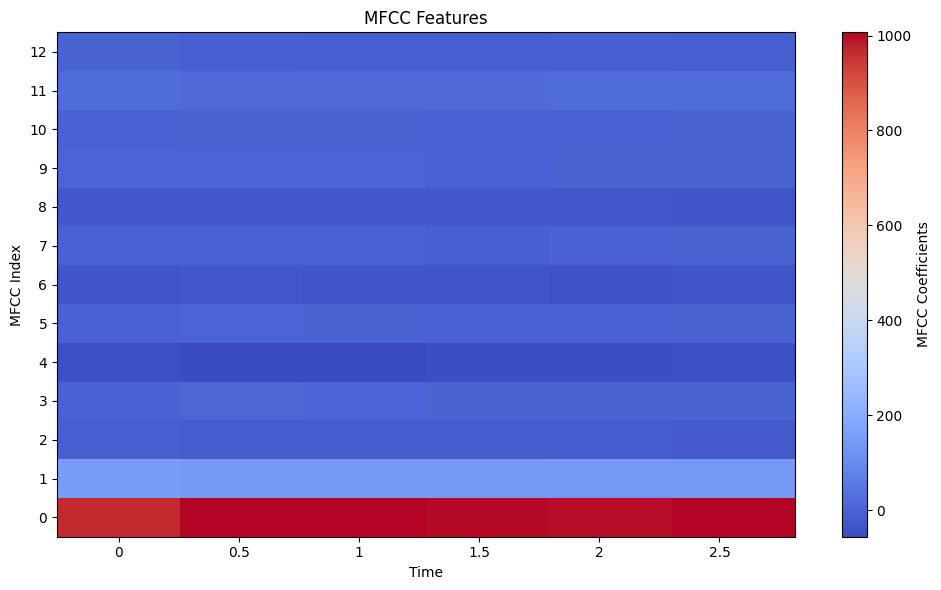

In [12]:
mfccs = librosa.feature.mfcc(y=resampled.astype(float), sr=1000, n_mfcc=13)

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=1000)
plt.colorbar(label='MFCC Coefficients')
plt.title("MFCC Features")
plt.ylabel("MFCC Index")
plt.yticks(np.arange(13), np.arange(13))
plt.tight_layout()
plt.show()